# Classificação de Texto Usando NLP

### - Natural Lenguagem Process (NLP) representa os métodos de processamento e aprendizagem de textos ou aúdios. 
### - Usaremos uma base de dados com quase 3000 registros de avaliações de produtos de clientes da Aamzon.
### - Nosso objetivo princípal é criar um modelo deep learning de previsão de avaliação de feedback
### - Fonte: [www.kaggle.com/sid321axn/amazon-alexa-reviews](www.kaggle.com/sid321axn/amazon-alexa-reviews)

# 1 Importação das bibliotecas  <a id ="1"></a>

In [141]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2 Importação da base de dados

In [142]:
# Atribuindo a base de dados a df
df = pd.read_csv('amazon-alexa.tsv', sep = '\t')

In [143]:
# Exibindo os dados
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [144]:
df.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [146]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [147]:
df['verified_reviews'][1]

'Loved it!'

In [148]:
# Selecionando todos os valores com feedback positivo
positivo = df[df['feedback']==1]
positivo

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [149]:
# Selecionando todos os valores com feedback negativo
negativo = df[df['feedback']==0]
negativo

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


# 3 Visualização dos dados <a id ="3"></a>

C:\Users\rondi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


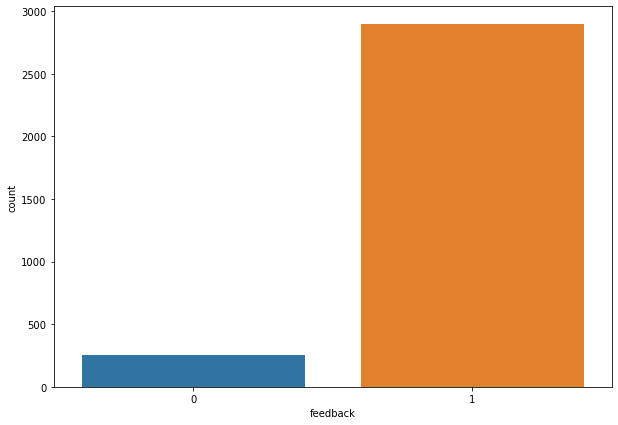

In [150]:
# Vamos exibir a contagem dos valores positivos e negativos
plt.figure(figsize = (10, 7))
sns.countplot(df['feedback'], label = 'Count');

In [151]:
x =100*len(df[df['feedback']==0])/len(df['feedback'])
print("Proporção de valores negativos em relação aos positivos: {:.2f} %".format(x))

Proporção de valores negativos em relação aos positivos: 8.16 %


### Mais de 90% das avaliações dos feedback são positivas, claramente temos um proplema de classificação bem desbalanceado

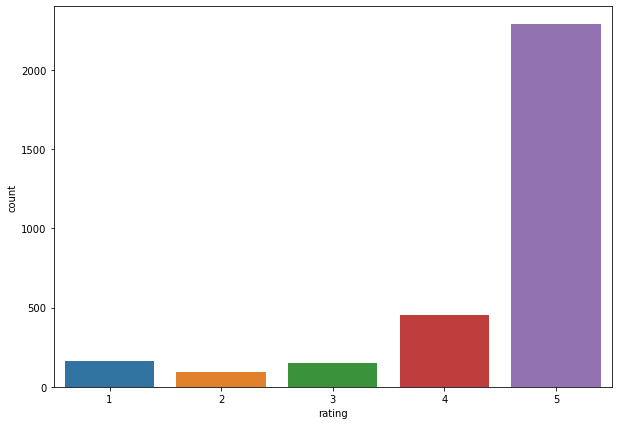

In [152]:
# Cotagem dos valores do rating
plt.figure(figsize = (10, 7))
sns.countplot(x = 'rating', data = df);

In [153]:
df['rating']

0       5
1       5
2       4
3       5
4       5
       ..
3145    5
3146    5
3147    5
3148    5
3149    4
Name: rating, Length: 3150, dtype: int64

In [154]:
y =100*len(df[df['rating']==5])/len(df['rating'])
print("Proporção dos valores com rating =5 em relação aos demais: {:.2f} %".format(y))

Proporção dos valores com rating =5 em relação aos demais: 72.57 %


### Avaliações com ranting 5 predomina sobre as demais

In [155]:
# Exibindo todos os valores únicos da feature 'variation'
df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

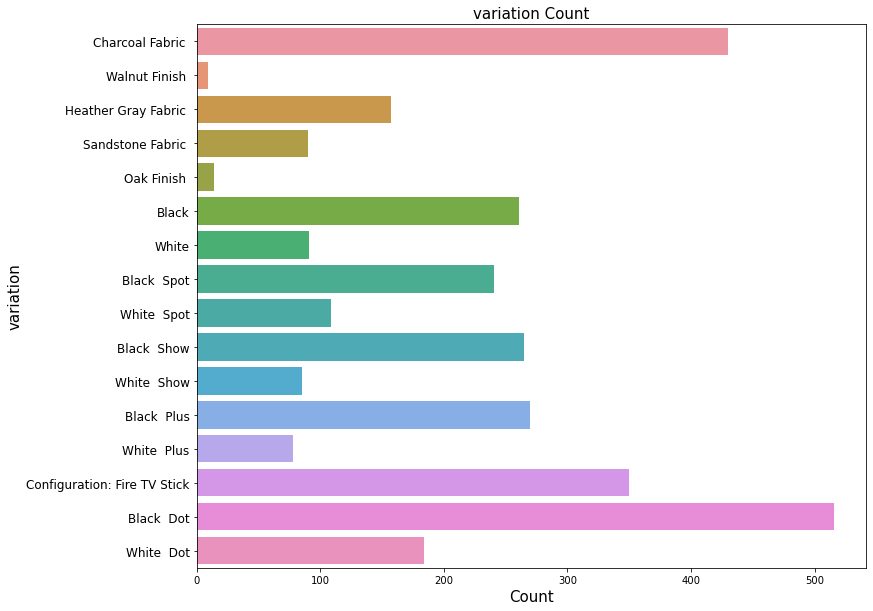

In [156]:
# Mostramos aqui as 'variações' (também conhecidas como relações pai-filho) que podem ser definidos como conjuntos de produtos relacionados entre si em termos de tamanho, cor, sabor, etc.
plt.figure(figsize = (12, 10))
sns.countplot(y = 'variation', data = df, orient='h')
plt.ylabel("variation", fontsize=15) #seting the xtitle and size
plt.xlabel("Count", fontsize=15) # Seting the ytitle and size
plt.title("variation Count", fontsize=15) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.show();

# 4 Limpeza dos dados 

### Aqui vamos converter as features categoricas em valores númericos

In [157]:
# Excluindo as features 'date' e 'rating'
df = df.drop(['date', 'rating'], axis = 1)

In [158]:
df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [159]:
# Agora criamos um dataset exclusivo para receber os valores codificados de df['variation']
variation_dummies = pd.get_dummies(df['variation'])

In [160]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [161]:
# Excluindo 'variation' de df
df.drop(['variation'], axis = 1, inplace=True)

In [162]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [163]:
# Juntando o dataset df com variation_dummies
df = pd.concat([df, variation_dummies], axis = 1)

# 5 Tokenização


In [164]:
#Convertendo as palavras numa matriz de tokens
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(df['verified_reviews'])

In [165]:
countvectorizer.shape

(3150, 4044)

In [166]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [167]:
df.drop(['verified_reviews'], axis = 1, inplace=True)

In [168]:
reviews = pd.DataFrame(countvectorizer.toarray())

In [169]:
df = pd.concat([df, reviews], axis = 1)

In [170]:
### Separando os dados em features e target

In [171]:
X = df.drop(['feedback'], axis = 1)

In [172]:
y = df['feedback']

In [173]:
# Separando X e y em partes treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [174]:
print(X_train.shape)
print(X_test.shape)

(2520, 4060)
(630, 4060)


# 6 Construção e treinamento da rede neural

In [175]:
# Construindo a rede neural usando keras
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu', input_shape=(4060,))) # Quantidade de parâmetros de entrada da rede neural
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [176]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 400)               1624400   
_________________________________________________________________
dense_10 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 401       
Total params: 1,785,201
Trainable params: 1,785,201
Non-trainable params: 0
_________________________________________________________________


In [177]:
# Definindo o otimizador da learning rate como 'Adam'
# Sendo um problema de classificação de duas classes usaremos a função de loss como 'binary_crossentropy'
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [178]:
# Aplicando o modelo no conjunto de dados treino
epochs_hist = classifier.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 5s 17ms/step - loss: 0.3734 - accuracy: 0.9060
Epoch 2/100
79/79 [==============================] - 1s 17ms/step - loss: 0.0985 - accuracy: 0.9521
Epoch 3/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0305 - accuracy: 0.9905
Epoch 4/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0136 - accuracy: 0.9957
Epoch 5/100
79/79 [==============================] - 1s 15ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 6/100
79/79 [==============================] - 1s 17ms/step - loss: 0.0169 - accuracy: 0.9938
Epoch 7/100
79/79 [==============================] - 1s 17ms/step - loss: 0.0146 - accuracy: 0.9947
Epoch 8/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0106 - accuracy: 0.9969
Epoch 9/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0188 - accuracy: 0.9896
Epoch 10/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0081 - accuracy: 0.9975

In [179]:
from sklearn.metrics import classification_report, confusion_matrix

# 7 Avaliação do modelo 

In [180]:
# Prevendo os valores de treino
y_pred_train = classifier.predict(X_train)
y_pred_train

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [181]:
# Os valores preditos estão entre 0 e 1, então definimos que valores maiores que 0.5  representam os avaliações positivos 1
y_pred_train = (y_pred_train > 0.5)
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [182]:
# Exibimos a matriz de confusão para so dados de treino
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 186,   12],
       [   1, 2321]], dtype=int64)

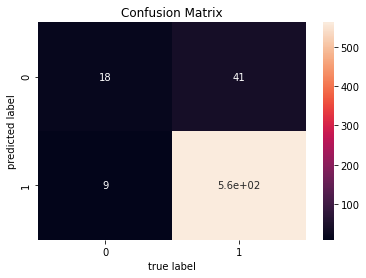

In [194]:
# Exibimos a matriz de confusão para so dados de treino
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("true label")
plt.ylabel("predicted label");

In [184]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5) # Aqui selecionamos todos valores maiores que 1 como avaliações positivas
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 18,  41],
       [  9, 562]], dtype=int64)

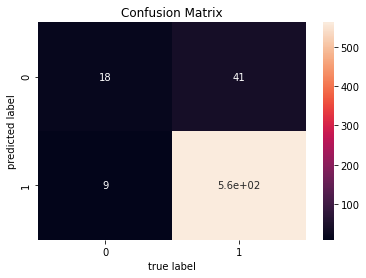

In [195]:
# Exibimos a matriz de confusão para so dados de teste
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True)
plt.xlabel("true label")
plt.ylabel("predicted label");

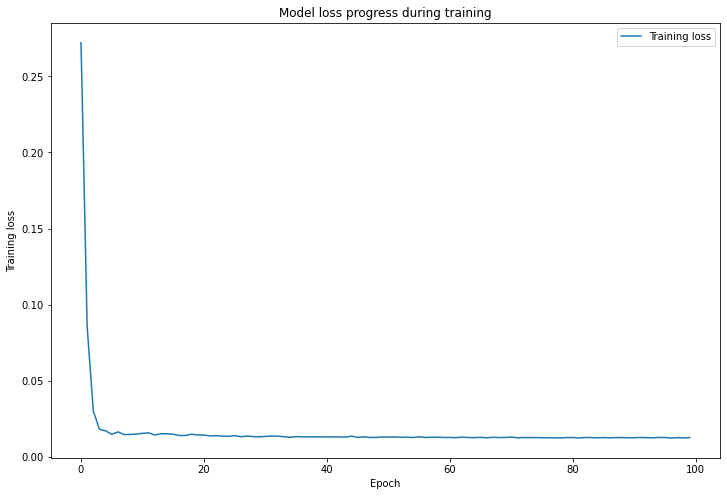

In [186]:
plt.figure(figsize=(12, 8))
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

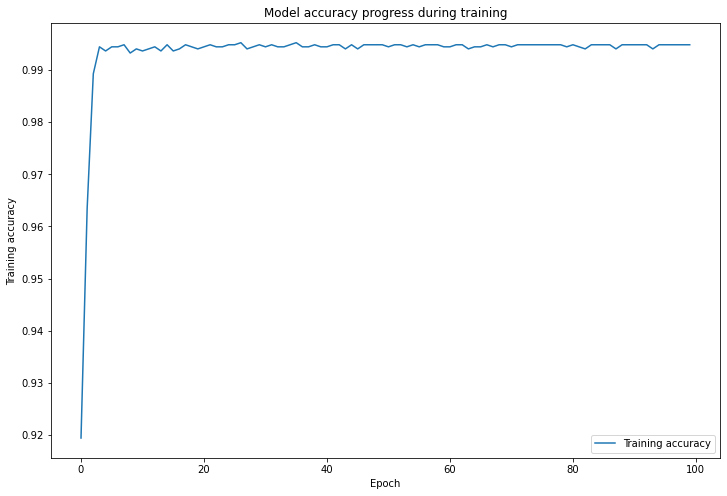

In [187]:
plt.figure(figsize=(12, 8))
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy']);

### A função classsification_report() permite exibir algumas métricas de avaliação 

In [188]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       198
           1       0.99      1.00      1.00      2322

    accuracy                           0.99      2520
   macro avg       0.99      0.97      0.98      2520
weighted avg       0.99      0.99      0.99      2520



### Para os valores de treino o algoritmo classifica muito para ambas as classes 0 e 1, como era de se esperar

In [190]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.31      0.42        59
           1       0.93      0.98      0.96       571

    accuracy                           0.92       630
   macro avg       0.80      0.64      0.69       630
weighted avg       0.91      0.92      0.91       630



### Quando avaliamos o modelo para os dados de teste há uma melhor avaliação da classificação para o valor 1 (94% de precisão) do que valor 0 (75% de precisão), Mesmo assim nosso modelo classificou bem